In [1]:
import pandas as pd

In [2]:
# read from prosperLoanData.csv columns 
selected_cols = ['BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield',
       'EstimatedLoss', 'EstimatedReturn', 'ProsperScore',
       'IsBorrowerHomeowner', 'IncomeRange', 'IncomeVerifiable',
       'StatedMonthlyIncome', 'LoanCurrentDaysDelinquent',
       'LoanOriginalAmount', 'LP_CustomerPayments',
       'LP_CustomerPrincipalPayments', 'PercentFunded', 'Investors','LoanStatus']
df = pd.read_csv('prosperLoanData.csv', usecols=selected_cols)
df.dropna(inplace=True)
df["LoanComplete"] = df["LoanStatus"].apply(lambda x: 1 if x in["Completed", "Current", "FinalPaymentInProgress"] else 0)
df.drop(columns=["LoanStatus"], inplace=True)
df.head()

,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperScore,IsBorrowerHomeowner,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanOriginalAmount,LP_CustomerPayments,LP_CustomerPrincipalPayments,PercentFunded,Investors,LoanComplete
1,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,7.0,False,"$50,000-74,999",True,6125.000000,0,10000,0.00,0.00,1.0,1,1
3,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,9.0,True,"$25,000-49,999",True,2875.000000,0,10000,5143.20,4091.09,1.0,158,1
4,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,4.0,True,"$100,000+",True,9583.333333,0,15000,2819.85,1563.22,1.0,20,1
5,0.15425,0.1314,0.1214,0.11567,0.0449,0.07077,10.0,True,"$100,000+",True,8333.333333,0,15000,679.34,351.89,1.0,1,1
6,0.31032,0.2712,0.2612,0.23820,0.1275,0.11070,2.0,False,"$25,000-49,999",True,2083.333333,0,3000,1226.70,604.25,1.0,1,1


In [3]:
income_mapping = {
    'Not employed': 0,
    '$0': 1,
    '$1-24,999': 2,
    '$25,000-49,999': 3,
    '$50,000-74,999': 4,
    '$75,000-99,999': 5,
    '$100,000+': 6
}

df['IncomeRange'] = df['IncomeRange'].map(income_mapping)
df['IsBorrowerHomeowner'] = df['IsBorrowerHomeowner'].astype(int)
df['IncomeVerifiable'] = df['IncomeVerifiable'].astype(int)

In [4]:
print(df.shape)
df.head()

(84853, 18)


,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperScore,IsBorrowerHomeowner,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanOriginalAmount,LP_CustomerPayments,LP_CustomerPrincipalPayments,PercentFunded,Investors,LoanComplete
1,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,7.0,0,4,1,6125.000000,0,10000,0.00,0.00,1.0,1,1
3,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,9.0,1,3,1,2875.000000,0,10000,5143.20,4091.09,1.0,158,1
4,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,4.0,1,6,1,9583.333333,0,15000,2819.85,1563.22,1.0,20,1
5,0.15425,0.1314,0.1214,0.11567,0.0449,0.07077,10.0,1,6,1,8333.333333,0,15000,679.34,351.89,1.0,1,1
6,0.31032,0.2712,0.2612,0.23820,0.1275,0.11070,2.0,0,3,1,2083.333333,0,3000,1226.70,604.25,1.0,1,1


In [5]:
x_df = df.drop(columns=["LoanComplete"])
y_df = df["LoanComplete"]
x_df.shape, y_df.shape

((84853, 17), (84853,))

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x_df)

Will retain only the first 4 components of the data as it contributes the most significantly to the variance.

In [7]:
#Change number of components to 4
pca = PCA(n_components=4)
principal_components = pca.fit_transform(scaled_data)

In [8]:
# variance explained sum
pca.explained_variance_ratio_.sum()

0.6704292998650625

In [9]:
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4'])
df_pca.head()

,PC1,PC2,PC3,PC4
0,2.814212,-2.128059,-0.435319,-0.226989
1,3.288787,-0.025787,-1.099136,-0.002262
2,-0.123369,0.155941,2.168885,-0.289513
3,2.669672,-0.870111,1.571753,0.227844
4,-3.103749,-0.986580,-0.434163,-0.803785


### First NN Model

In [10]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import keras.backend as K

def f1_metric(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(df_pca, y_df, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Build the neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification, so using sigmoid activation
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', f1_metric])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/10
1857/1857 [==============================] - 3s 1ms/step - loss: 0.1380 - accuracy: 0.9575 - f1_metric: 0.9763 - val_loss: 0.1276 - val_accuracy: 0.9612 - val_f1_metric: 0.9783
Epoch 2/10
1857/1857 [==============================] - 2s 1ms/step - loss: 0.1219 - accuracy: 0.9626 - f1_metric: 0.9792 - val_loss: 0.1283 - val_accuracy: 0.9630 - val_f1_metric: 0.9794
Epoch 3/10
1857/1857 [==============================] - 2s 1ms/step - loss: 0.1193 - accuracy: 0.9637 - f1_metric: 0.9798 - val_loss: 0.1242 - val_accuracy: 0.9620 - val_f1_metric: 0.9788
Epoch 4/10
1857/1857 [==============================] - 2s 1ms/step - loss: 0.1181 - accuracy: 0.9643 - f1_metric: 0.9801 - val_loss: 0.1237 - val_accuracy: 0.9632 - val_f1_metric: 0.9795
Epoch 5/10
1857/1857 [==============================] - 2s 1ms/step - loss: 0.1174 - accuracy: 0.9644 - f1_metric: 0.9801 - val_loss: 0.1228 - val_accuracy: 0.9627 - val_f1_metric: 0.9792
Epoch 6/10
1857/1857 [==============================] - 2s 1

In [11]:
# eval on test
results = model.evaluate(X_test, y_test)
print('test loss, test acc, test f1:', results)

398/398 [==============================] - 0s 754us/step - loss: 0.1198 - accuracy: 0.9640 - f1_metric: 0.9799
test loss, test acc, test f1: [0.11981552094221115, 0.964016318321228, 0.979895830154419]


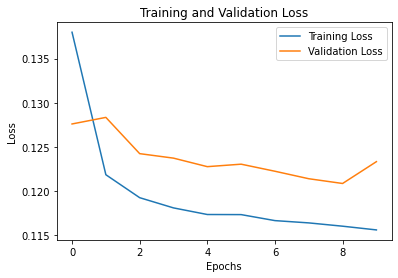

In [12]:
# plot loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

### Second Model To Reduce Overfitting
* Smaller NN Architecture
* Added DropOuts and Regularization
* Added Early Stopping
* Reduced training batch size

In [13]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

# Build the neural network with dropout layers and reduced complexity
model2 = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),  # Add dropout layer with 20% dropout rate
    Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)),  # Add L2 regularization
    Dropout(0.2),  # Add another dropout layer
    Dense(1, activation='sigmoid')  # Binary classification, so using sigmoid activation
])

model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy', f1_metric])

# Implement early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with reduced batch size and early stopping
history2 = model2.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_val, y_val), callbacks=[early_stopping])


Epoch 1/30
3713/3713 [==============================] - 5s 1ms/step - loss: 0.1920 - accuracy: 0.9536 - f1_metric: 0.9737 - val_loss: 0.1452 - val_accuracy: 0.9599 - val_f1_metric: 0.9773
Epoch 2/30
3713/3713 [==============================] - 5s 1ms/step - loss: 0.1445 - accuracy: 0.9595 - f1_metric: 0.9770 - val_loss: 0.1367 - val_accuracy: 0.9593 - val_f1_metric: 0.9768
Epoch 3/30
3713/3713 [==============================] - 4s 1ms/step - loss: 0.1389 - accuracy: 0.9606 - f1_metric: 0.9777 - val_loss: 0.1339 - val_accuracy: 0.9613 - val_f1_metric: 0.9780
Epoch 4/30
3713/3713 [==============================] - 4s 1ms/step - loss: 0.1359 - accuracy: 0.9618 - f1_metric: 0.9783 - val_loss: 0.1322 - val_accuracy: 0.9632 - val_f1_metric: 0.9791
Epoch 5/30
3713/3713 [==============================] - 4s 1ms/step - loss: 0.1342 - accuracy: 0.9621 - f1_metric: 0.9785 - val_loss: 0.1302 - val_accuracy: 0.9625 - val_f1_metric: 0.9787
Epoch 6/30
3713/3713 [==============================] - 4s 1

In [14]:
results = model2.evaluate(X_test, y_test)
print('test loss, test acc, test f1:', results)

398/398 [==============================] - 0s 907us/step - loss: 0.1251 - accuracy: 0.9637 - f1_metric: 0.9797
test loss, test acc, test f1: [0.12507525086402893, 0.9637020826339722, 0.9797242283821106]


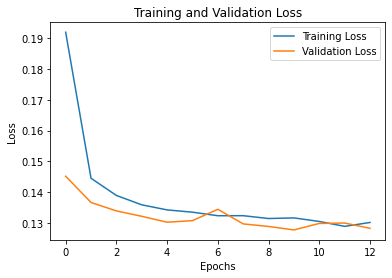

In [15]:
import matplotlib.pyplot as plt
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()